In [2]:
filename = 'BRCA_prognosis.txt'
with open(filename, 'r') as fin:
    lines = fin.readlines()
## 1-1) Parsing
samples = lines[0].rstrip().split('\t')[1:]
labels = lines[1].rstrip().split('\t')[1:]
genes = []
data = []
ndata = []
for line in lines[2:]:
    tmp = line.rstrip().split('\t')
    genes.append(tmp[0])
    data.append(tmp[1:])
## 1-2) Converting to numpy format
import numpy as np

In [3]:
x=[ 
1459,
10647,
1639 ,
7943 ,
9711 ,
4094 ,
15363,
5009,
9631,
16364,
13844,
15354,
13882,
12644,
6746,
8342,
15157,
316,
9128,
7942,
13914,
13798,
4325,
8120,
11989,
2888,
13964,
9655,
5619,
1844,
8929,
2534,
4112,
13550,
2261,
8651,
14653,
136,
5869,
3519,
223,
8691,
4996,
6340,
3727,
12042,
8841,
14550,
7753,
9675,
9440,
11380,
3915,
7789,
15862,
2845,
7222,
6753,
9807,
1537,
8287,
4808,
14774,
8035,
10072,
7091,
16220,
2461,
12105,
7650,
4967,
14487,
1841,
16022,
4394,
8989,
1413,
8585,
581,
15231,
614,
13354,
14333,
15164,
5597,
7207,
10183,
12879,
11746,
1032,
9997,
5903,
8367,
2535,
9000,
3754,
14904,
14212,
6790,
10048,
2637,
6752,
10863,
14877,
3654,
6225,
11318,
4479,
12597,
13843,
12682,
15179,
12649,
9905,
7359,
12293,
7436,
337,
2734,
8290,
3090,
3564,
6881,
1619,
11782,
12384,
8446,
6796,
11446,
7691,
3268,
15801,
6885,
6960,
9486,
11604,
15781,
7772,
4098,
9896,
8569,
9111,
11971,
12266,
2638,
10455,
9452,
12052,
10686,
2162,
10184,
1428,
15839,
15850,
15978,
1246,
16436,
15934,
5938,
2959,
5447,
4388,
12271,
14740,
14629,
12387,
14060,
7170,
8197,
12314,
14807,
2326,
8902,
10554,
8977,
16192,
4669,
6612,
5133,
473,
5546,
5703,
13214,
604,
12789,
1867,
6671,
5323,
4102,
243,
15806,
3815,
3747,
6008,
7112,
9291,
6575,
2078,
6164,
1024,
12809,
11367,
15156,
 6966,
10345,
14124,
15426,
6833,
12006,
11810,
7646,
13716,
8024,
2758,
8012,
2227,
12294,
15482,
12970,
5343,
8364,
15212,
13912,
11599,
11917,
12268,
14959,
1558,
1298,
5063,
2036,
3249,
5471,
10898,
3807,
11533,
14921,
4578,
10999,
3700,
11210,
11473,
10152,
6723,
4055,
7370,
9250,
12261,
9423,
11052,
12690,
1475,
3808,
13018,
2804,
14168,
5966,
15861,
11125,
3733,
6941,
10547,
2686,
2785,
9713,
6390,
14884,
8925,
139,
6295,
499,
16453,
10171,
10911,
3743,
10673,
11602,
1734,
11722,
6695,
5189,
15107,
1028,
9141,
15964,
4585,
15474,
1857,
6801,
10552,
11996,
5848,
12080,
3695,
846,
13512,
15777,
12738,
12324,
2813,
9922,
14387,
6803,
14379,
12228,
3454,
12729,
16191,
6302,
16474,
2799,
14683,
2798,
14978,
725,
7817,
6943,
5026,
12296]
ndata=[]
for i in range(319):
    ndata.append(data[x[i]-1])

In [4]:
X = np.array(ndata, dtype=np.float32).T
y = np.array(labels, dtype=np.float32)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

In [7]:
from sklearn.svm import SVC
clf = SVC(kernel='poly', probability=True)

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=2)

In [35]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

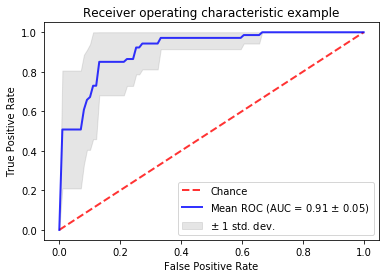

In [14]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
kfold = KFold(10, True, 1)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=0
for train, test in kfold.split(X, y):
    probas_ = clf.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()